In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [19]:
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.shape

(381109, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

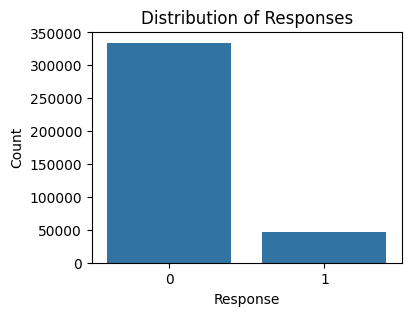

In [11]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Response', data=df)
plt.ylabel('Count')
plt.title('Distribution of Responses')
plt.show()

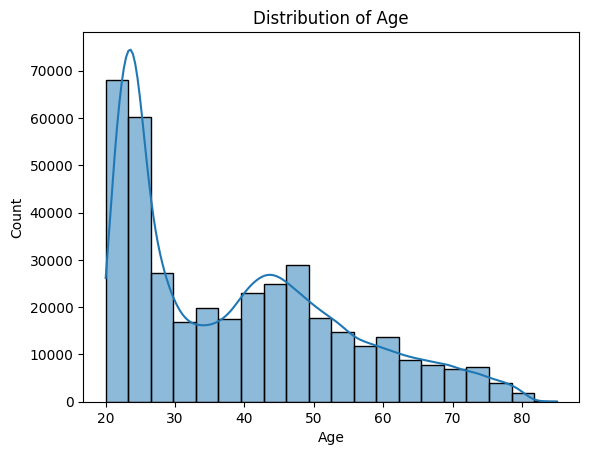

In [8]:
sns.histplot(x=df['Age'], bins=20 ,kde=True)
plt.title('Distribution of Age')
plt.show()

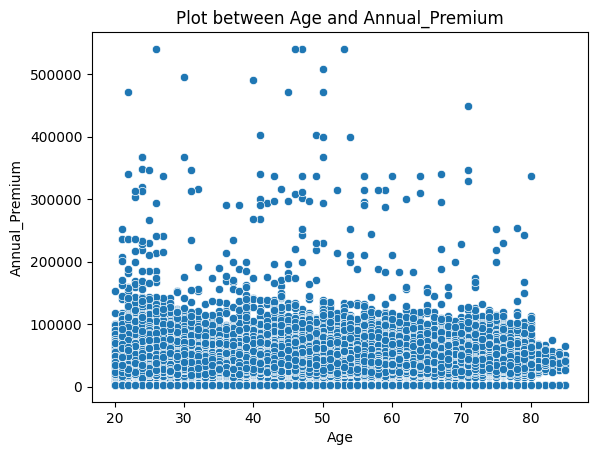

In [12]:
sns.scatterplot(data=df, x='Age', y='Annual_Premium')
plt.title('Plot between Age and Annual_Premium')
plt.show()

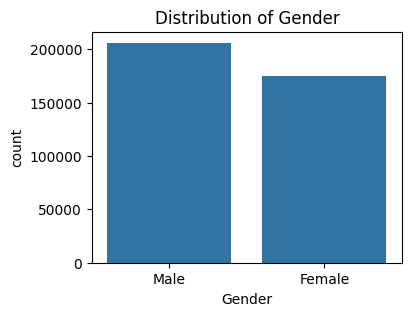

In [15]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.show()

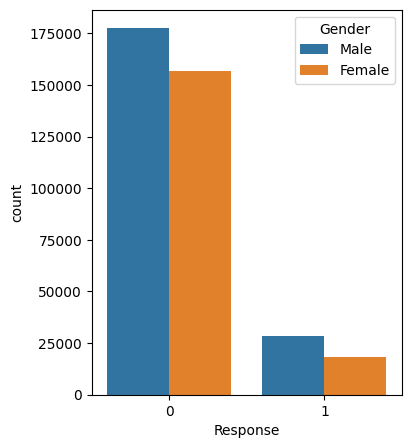

In [16]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='Response', hue='Gender')
plt.show()

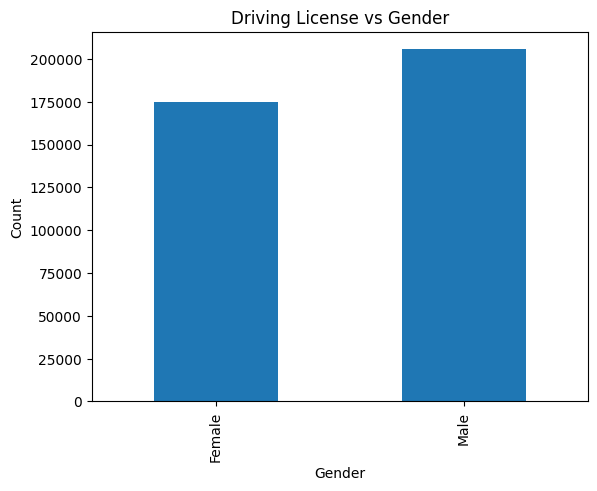

In [31]:
df.groupby('Gender')['Driving_License'].sum().plot(kind='bar')
plt.ylabel('Count')
plt.title('Driving License vs Gender')
plt.show()

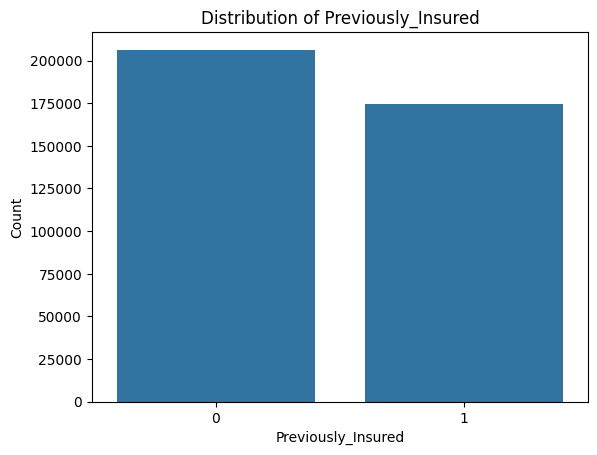

In [32]:
sns.countplot(data=df, x='Previously_Insured')
plt.ylabel('Count')
plt.title('Distribution of Previously_Insured')
plt.show()

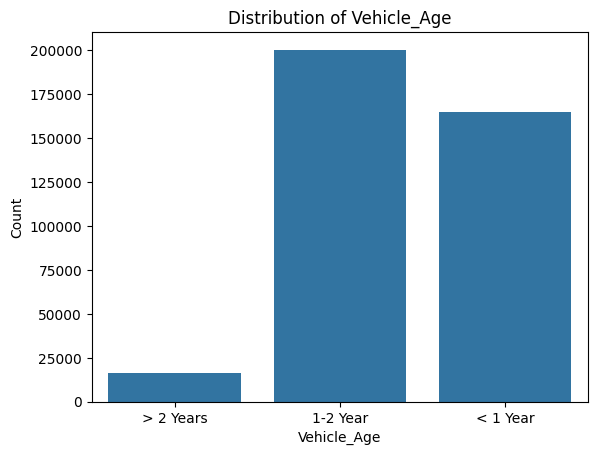

In [33]:
sns.countplot(data=df, x='Vehicle_Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle_Age')
plt.show()

In [40]:
data = df.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
data.head()

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305


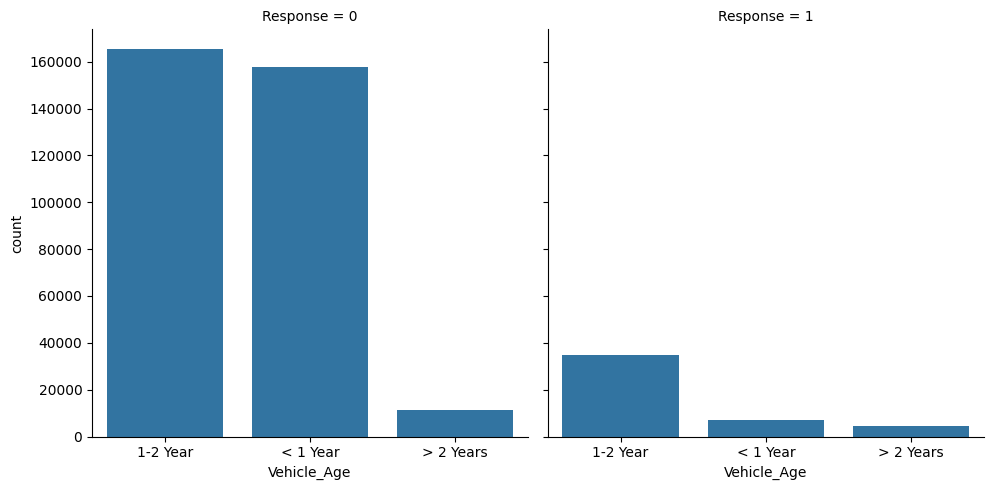

In [46]:
sns.catplot(data=data, x='Vehicle_Age', y='count', col='Response', kind='bar')
plt.show()